In [3]:
from rdflib import Graph, URIRef, Literal, Namespace
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict


BOK Graph loaded : 324 triples
Number of distinct KU: 162


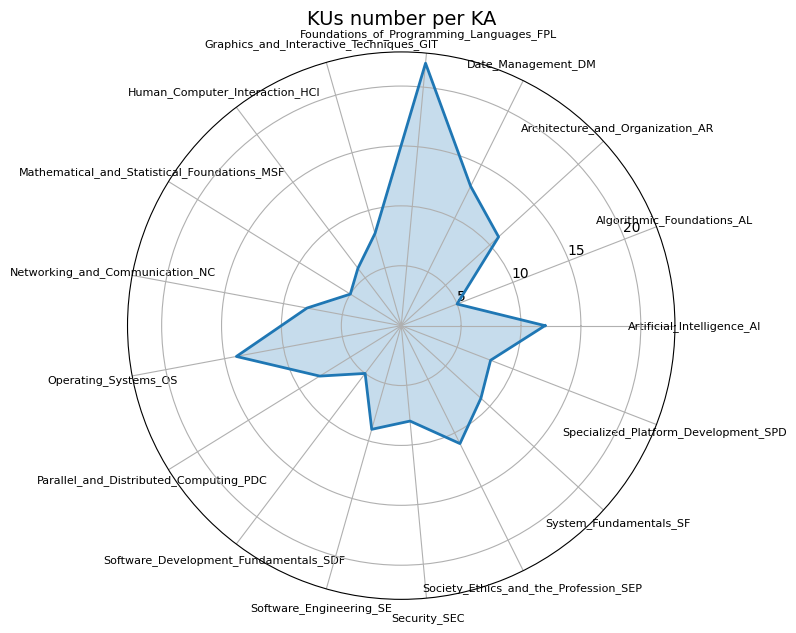

In [4]:

# this graph (./XP/graph_bok_nohours.ttl) looks good

gbok_ref = Graph()
BOK_RDF_FILE_PATH = "./XP/graph_bok_nohours.ttl"
gbok_ref.parse(BOK_RDF_FILE_PATH, format="turtle")
print(f"BOK Graph loaded : {gbok_ref.__len__()} triples")

query_du= """
PREFIX bok: <http://example.org/bok/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT  (count(distinct ?ku) as ?nb_ku)
WHERE {
  ?ku bok:part_of ?ka .
} 
"""
nb_ku = gbok_ref.query(query_du)
for row in nb_ku:
    print(f"Number of distinct KU: {row.nb_ku}")

distinct_ku= """
PREFIX bok: <http://example.org/bok/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?ka (count(distinct ?ku) as ?nb_ku)
WHERE {
  ?ku bok:part_of ?ka .
} group by ?ka
"""

ref_data = gbok_ref.query(distinct_ku)
# Extraire les données
labels = []
values = []

for row in ref_data:
    labels.append(str(row.ka).split("/")[-1])
    values.append(int(row.nb_ku))

# Fermer le polygone
values.append(values[0])  # refermer la boucle des valeurs
angles = np.linspace(0, 2 * np.pi, len(values) - 1, endpoint=False).tolist()
angles.append(angles[0])  # refermer la boucle des angles

# Radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

# Axe des noms : attention, angles[:-1] car le dernier est la fermeture
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=8)
ax.set_title("KUs number per KA", size=14, pad=20)
ax.grid(True)
plt.tight_layout()
plt.show()


In [5]:
## Old code

# from rdflib import Graph, URIRef, Literal, Namespace
# g_all = Graph()


# from pathlib import Path
# chemins = [Path("../data/master2025"), Path("../XP/alignment_results")]
# fichiers_ttl = []
# for chemin in chemins:
#     print(f"Path : {chemin}")
#     fichiers_ttl.extend([f for f in chemin.rglob("*.ttl") if f.is_file()])

# print(f"Files : {fichiers_ttl}")

# for f in fichiers_ttl:
#     print(f"File : {f}")
#     g_all.parse(f, format="turtle")

# print(f"Graph loaded : {g_all.__len__()} triples")

In [6]:
from rdflib import Graph, URIRef, Literal, Namespace
g = Graph()

TTLs = ["XP/all-align-0-100.ttl","XP/all-align-100-200.ttl","XP/all-align-200-300.ttl","data/all2025.ttl"]


for f in TTLs:
    print(f"File : {f}")
    g.parse(f, format="turtle")

print(f"Graph loaded : {g.__len__()} triples")

File : XP/all-align-0-100.ttl
File : XP/all-align-100-200.ttl
File : XP/all-align-200-300.ttl
File : data/all2025.ttl
Graph loaded : 24976 triples


In [7]:
distinct_ue= """
PREFIX ns1: <http://example.org/course/>

SELECT (COUNT(DISTINCT ?s) AS ?nb_UE)
WHERE {
  ?s ns1:content ?content .
}
"""

empty_content= """
PREFIX ns1: <http://example.org/course/>

SELECT (COUNT(?s) AS ?nb_sujets_courts)
WHERE {
  ?s ns1:content ?content .
  FILTER(STRLEN(STR(?content)) < 10)
}
"""

qres = g.query(distinct_ue)
for row in qres:
    print(f"Number of distinct UE: {row.nb_UE}")

qres = g.query(empty_content)
for row in qres:
    print(f"Number of short content: {row.nb_sujets_courts}")

Number of distinct UE: 191
Number of short content: 6


In [8]:
# Build a full graduation program and computes its profile

query = """
PREFIX ex: <http://example.org/course/>
prefix ns1: <http://provo.org/> 
prefix ns3: <http://align.org/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

select ?ka ?ku ?ue WHERE {
  { SELECT distinct ?ue WHERE {
        {
        ?ue a ex:UE .
        ?ue ex:parcours_level "L1" ;
            ex:parcours_code "INFO" .
        } Union {
        ?ue a ex:UE .
        ?ue ex:parcours_level "L2" ;
            ex:parcours_code "INFO" ;
        } union {
        ?ue a ex:UE .
        ?ue ex:parcours_level "L3" ;
            ex:parcours_code "INFO" .
        } union {
        ?ue a ex:UE .
        ?ue ex:parcours_level "M1" ;
            ex:parcours_code "ALMA" .
        } union {
        ?ue a ex:UE .
        ?ue ex:parcours_level "M2" ;
            ex:parcours_code "ALMA" .
        } 
    } # where
  } # select
  ?ue ns3:to [
    ex:answer "1" ;
    ex:ku ?ku ;
    ex:ka ?ka ;
    ns1:wasGeneratedBy [ ns1:used "llama3-8b-8192" ]
    ] .
} 
"""

# Execute the query
results = g.query(query)

# Print the results
print(f"Number of results: {len(results)}")
for row in results:
    print(f"KA: {row.ka}, KU: {row.ku} UE: {row.ue}")


Number of results: 242
KA: Software_Engineering_SE, KU: SE-Formal_Methods UE: http://example.org/course/UE_XLG1AU050
KA: Artificial_Intelligence_AI, KU: AI-NLP_Natural_Language_Processing UE: http://example.org/course/UE_XLG1AU050
KA: Specialized_Platform_Development_SPD, KU: SPD-Common_Aspects UE: http://example.org/course/UE_XLG1AU050
KA: Specialized_Platform_Development_SPD, KU: SPD-Common_Aspects UE: http://example.org/course/UE_XLG1IU010
KA: Software_Development_Fundamentals_SDF, KU: SDF-Society_Ethics_and_the_Profession UE: http://example.org/course/UE_XLG1IU010
KA: Software_Engineering_SE, KU: SE-Formal_Methods UE: http://example.org/course/UE_XLG1IU010
KA: Mathematical_and_Statistical_Foundations_MSF, KU: MSF-Calculus UE: http://example.org/course/UE_XLG1MU040
KA: Mathematical_and_Statistical_Foundations_MSF, KU: MSF-Linear_Linear_Algebra UE: http://example.org/course/UE_XLG1MU040
KA: Mathematical_and_Statistical_Foundations_MSF, KU: MSF-Linear_Linear_Algebra UE: http://example

In [22]:
# Build a full graduation program and computes its profile

from string import Template

def get_ka_data(graph, L1_code,L2_code, L3_code, M1_code, M2_code, LLM_model):
    template_query = Template("""
        PREFIX ex: <http://example.org/course/>
        prefix ns1: <http://provo.org/> 
        prefix ns3: <http://align.org/> 
        prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

        select ?ka (count(distinct ?ku) as ?nb_ku) WHERE {
        { SELECT distinct ?ue WHERE {
                {
                ?ue a ex:UE .
                ?ue ex:parcours_level "L1" ;
                    ex:parcours_code "${L1_code}" .
                } Union {
                ?ue a ex:UE .
                ?ue ex:parcours_level "L2" ;
                    ex:parcours_code "${L2_code}" ;
                } union {
                ?ue a ex:UE .
                ?ue ex:parcours_level "L3" ;
                    ex:parcours_code "${L3_code}" .
                } union {
                ?ue a ex:UE .
                ?ue ex:parcours_level "M1" ;
                    ex:parcours_code "${M1_code}" .
                } union {
                ?ue a ex:UE .
                ?ue ex:parcours_level "M2" ;
                    ex:parcours_code "${M2_code}" .
                } 
            } # where
        } # select
        ?ue ns3:to [
            ex:answer "1" ;
            ex:ku ?ku ;
            ex:ka ?ka ;
            ns1:wasGeneratedBy [ ns1:used "${LLM_model}" ]
            ] .
        } group by ?ka
        """)
    query = template_query.substitute(
        L1_code=L1_code,
        L2_code=L2_code,
        L3_code=L3_code,
        M1_code=M1_code,
        M2_code=M2_code,
        LLM_model=LLM_model
    )

    # Execute the query
    results = graph.query(query)

    # Print the results
#    print(f"Number of results: {len(results)}")
#    for row in results:
#        print(f"KA: {row.ka}, {row.nb_ku}")
    return results

results=get_ka_data(g, "INFO", "INFO", "INFO", "ALMA", "ALMA", "llama3-8b-8192")
print(f"Number of results: {len(results)}")
for row in results:
    print(f"KA: {row.ka}, {row.nb_ku}")


Number of results: 15
KA: Specialized_Platform_Development_SPD, 3
KA: Artificial_Intelligence_AI, 3
KA: Software_Engineering_SE, 5
KA: Software_Development_Fundamentals_SDF, 4
KA: Mathematical_and_Statistical_Foundations_MSF, 4
KA: Foundations_of_Programming_Languages_FPL, 13
KA: Algorithmic_Foundations_AL, 4
KA: Graphics_and_Interactive_Techniques_GIT, 4
KA: Society_Ethics_and_the_Profession_SEP, 1
KA: Date_Management_DM, 3
KA: Parallel_and_Distributed_Computing_PDC, 3
KA: Architecture_and_Organization_AR, 3
KA: Networking_and_Communication_NC, 2
KA: System_Fundamentals_SF, 2
KA: Security_SEC, 1


In [23]:
# Define the SPARQL query to display parcours_code by parcours_level
query_parcours = """
PREFIX ex: <http://example.org/course/>
SELECT ?level ?code
WHERE {
    ?ue ex:parcours_level ?level ;
        ex:parcours_code ?code .
}
GROUP BY ?level ?code
ORDER BY ?level 
"""

# Execute the query
results_parcours = g.query(query_parcours)

# Print the results
print(f"Number of results: {len(results_parcours)}")
for row in results_parcours:
    print(f"Level: {row.level}, Code: {row.code}")

Number of results: 27
Level: L1, Code: INFO
Level: L1, Code: INFOMATH
Level: L1, Code: INFOMATHPA
Level: L1, Code: INFOPA
Level: L2, Code: CMI
Level: L2, Code: INFO
Level: L2, Code: INFOLAAS
Level: L2, Code: INFOMATH
Level: L3, Code: CMI
Level: L3, Code: INFO
Level: L3, Code: INFOLAAS
Level: L3, Code: INFOMATH
Level: L3, Code: MIAGE
Level: L3, Code: MIAGEALTERNANCE
Level: M1, Code: DS
Level: M1, Code: VICO
Level: M1, Code: CMI
Level: M1, Code: ALMA
Level: M1, Code: ATAL
Level: M1, Code: CMD
Level: M1, Code: ORO
Level: M2, Code: DS
Level: M2, Code: VICO
Level: M2, Code: CMI
Level: M2, Code: ALMA
Level: M2, Code: ATAL
Level: M2, Code: ORO


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ka_radar(results, ref_data, title="Radar View"):
    def sparql_to_dict(sparql_results):
        result_dict = {}
        for row in sparql_results:
            label = str(row.ka).split("/")[-1]
            value = int(row.nb_ku)
            result_dict[label] = value
        return result_dict

    # Extraction des données
    results_dict = sparql_to_dict(results)
    ref_dict = sparql_to_dict(ref_data)

    # Union des labels
    all_labels = sorted(set(results_dict) | set(ref_dict))

    # Alignement des valeurs
    values_results = [results_dict.get(label, 0) for label in all_labels]
    values_ref = [ref_dict.get(label, 0) for label in all_labels]

    # Préparation des angles
    num_vars = len(all_labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += [angles[0]]

    values_results += [values_results[0]]
    values_ref += [values_ref[0]]

    # Radar plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    ax.plot(angles, values_results, linewidth=2, linestyle='solid', label='Résultats')
    ax.fill(angles, values_results, alpha=0.25)

    ax.plot(angles, values_ref, linewidth=2, linestyle='dashed', label='Référence')
    ax.fill(angles, values_ref, alpha=0.15)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(all_labels, fontsize=9, rotation=30, ha='right')

    ax.set_title(title, y=1.1, fontsize=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.tight_layout()
    plt.show()


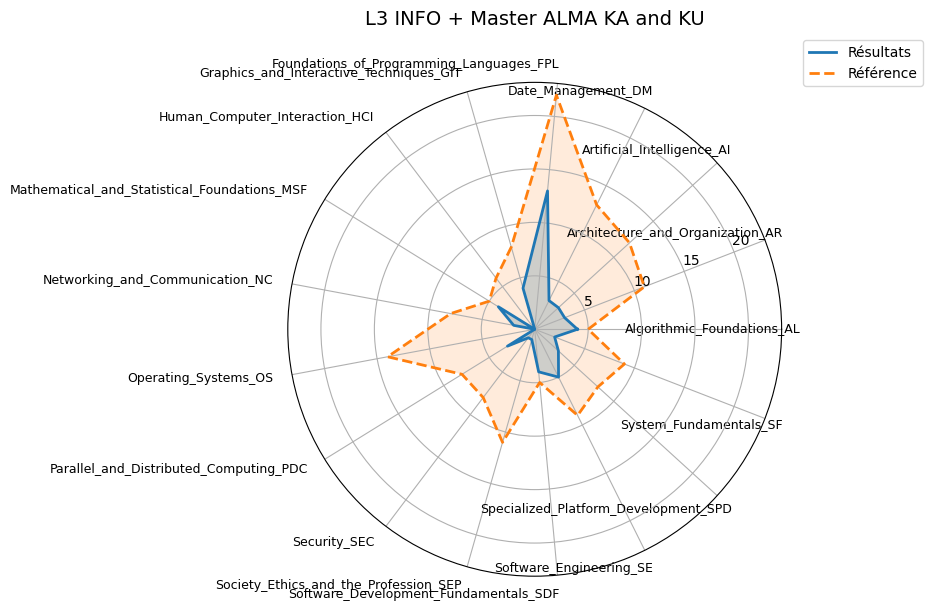

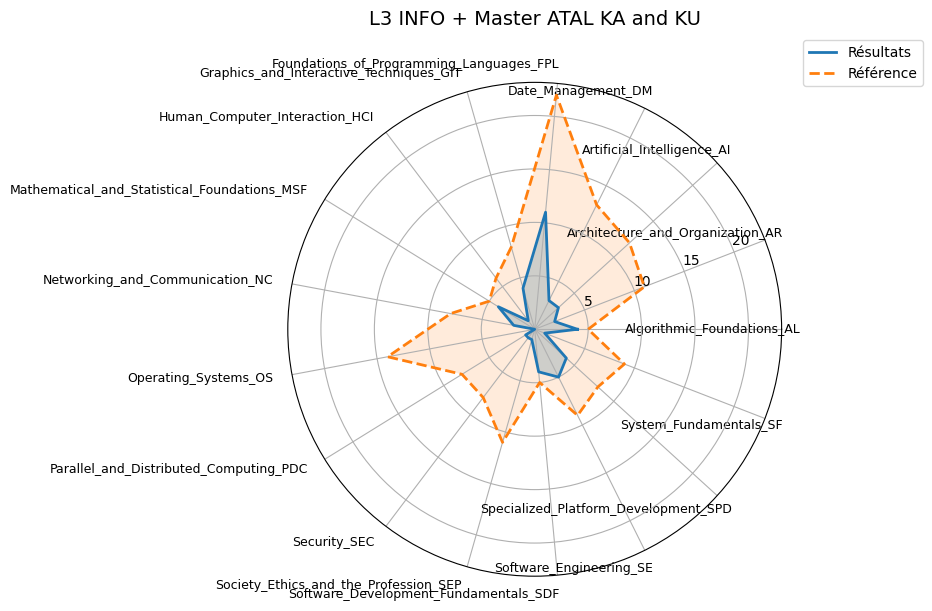

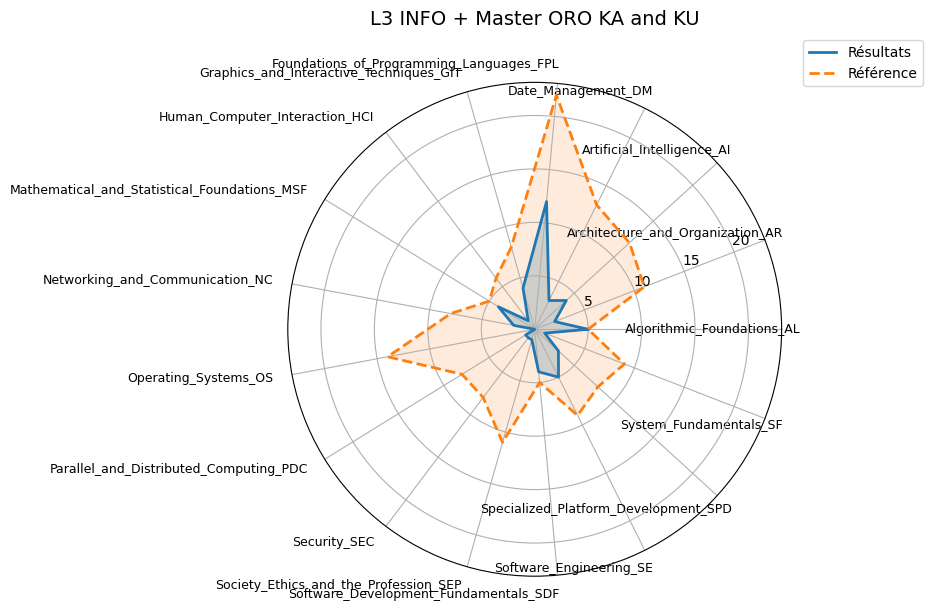

In [26]:

ALMA_data = get_ka_data(g, "INFO", "INFO", "INFO", "ALMA", "ALMA", "llama3-8b-8192")
ATAL_data = get_ka_data(g, "INFO", "INFO", "INFO", "ATAL", "ATAL", "llama3-8b-8192")
ORO_data = get_ka_data(g, "INFO", "INFO", "INFO", "ORO", "ORO", "llama3-8b-8192")


plot_ka_radar(ALMA_data, ref_data, title="L3 INFO + Master ALMA KA and KU")
plot_ka_radar(ATAL_data, ref_data, title="L3 INFO + Master ATAL KA and KU")
plot_ka_radar(ORO_data, ref_data, title="L3 INFO + Master ORO KA and KU")

In [41]:
aligned_ue= """
prefix ns1: <http://provo.org/> 
prefix ns2: <http://example.org/course/> 
prefix ns3: <http://align.org/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT DISTINCT ?ue ?parcours ?ku ?ka
WHERE {
  ?ue ns2:parcours_code  ?parcours .
  ?ue ns3:to [
    ns2:answer "1" ;
    ns2:ku ?ku ;
    ns2:ka ?ka ;
    ns1:wasGeneratedBy [ ns1:used "llama3-8b-8192" ]
  ] .
} limit 10
"""
qres = g.query(aligned_ue)
for row in qres:
    print(f"UE: {row.ue}, ?parcours {row.parcours}, KU: {row.ku}, KA: {row.ka}")

UE: http://example.org/course/UE_Inconnu, ?parcours DS, KU: AI-Vision_Perception_and_Computer_Vision, KA: Artificial_Intelligence_AI
UE: http://example.org/course/UE_Inconnu, ?parcours VICO, KU: AI-Vision_Perception_and_Computer_Vision, KA: Artificial_Intelligence_AI
UE: http://example.org/course/UE_Inconnu, ?parcours DS, KU: SPD-Game_Platforms, KA: Specialized_Platform_Development_SPD
UE: http://example.org/course/UE_Inconnu, ?parcours VICO, KU: SPD-Game_Platforms, KA: Specialized_Platform_Development_SPD
UE: http://example.org/course/UE_Inconnu, ?parcours DS, KU: GIT-Fundamentals, KA: Graphics_and_Interactive_Techniques_GIT
UE: http://example.org/course/UE_Inconnu, ?parcours VICO, KU: GIT-Fundamentals, KA: Graphics_and_Interactive_Techniques_GIT
UE: http://example.org/course/UE_Inconnu, ?parcours DS, KU: SEP-Methods_for_Ethical_Analysis, KA: Society_Ethics_and_the_Profession_SEP
UE: http://example.org/course/UE_Inconnu, ?parcours VICO, KU: SEP-Methods_for_Ethical_Analysis, KA: Societ

In [42]:
radar_llama3_8b= """
prefix ns1: <http://provo.org/> 
prefix ns2: <http://example.org/course/> 
prefix ns3: <http://align.org/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT DISTINCT  ?parcours ?ka (count(distinct ?ku) as ?nb_ku)
WHERE {
  ?ue ns2:parcours_code  ?parcours .
  ?ue ns3:to [
    ns2:answer "1" ;
    ns2:ku ?ku ;
    ns2:ka ?ka ;
    ns1:wasGeneratedBy [ ns1:used "llama3-8b-8192" ]
  ] .
} group by ?parcours ?ka
"""
radar_data = g.query(radar_llama3_8b)
for row in radar_data:
    print(f"Parcours: {row.parcours}, KA: {row.ka}, KU: {row.nb_ku}")

Parcours: DS, KA: Artificial_Intelligence_AI, KU: 4
Parcours: VICO, KA: Artificial_Intelligence_AI, KU: 4
Parcours: DS, KA: Specialized_Platform_Development_SPD, KU: 4
Parcours: VICO, KA: Specialized_Platform_Development_SPD, KU: 4
Parcours: DS, KA: Graphics_and_Interactive_Techniques_GIT, KU: 4
Parcours: VICO, KA: Graphics_and_Interactive_Techniques_GIT, KU: 4
Parcours: DS, KA: Society_Ethics_and_the_Profession_SEP, KU: 2
Parcours: VICO, KA: Society_Ethics_and_the_Profession_SEP, KU: 2
Parcours: DS, KA: Mathematical_and_Statistical_Foundations_MSF, KU: 4
Parcours: VICO, KA: Mathematical_and_Statistical_Foundations_MSF, KU: 4
Parcours: DS, KA: Date_Management_DM, KU: 1
Parcours: VICO, KA: Date_Management_DM, KU: 1
Parcours: DS, KA: Algorithmic_Foundations_AL, KU: 3
Parcours: VICO, KA: Algorithmic_Foundations_AL, KU: 3
Parcours: DS, KA: Human_Computer_Interaction_HCI, KU: 1
Parcours: VICO, KA: Human_Computer_Interaction_HCI, KU: 1
Parcours: DS, KA: Foundations_of_Programming_Languages_F

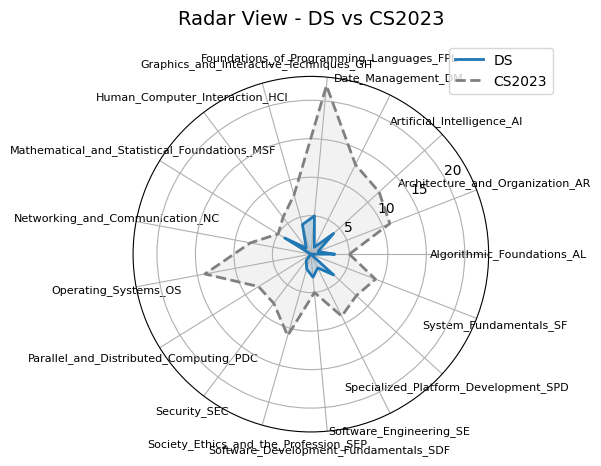

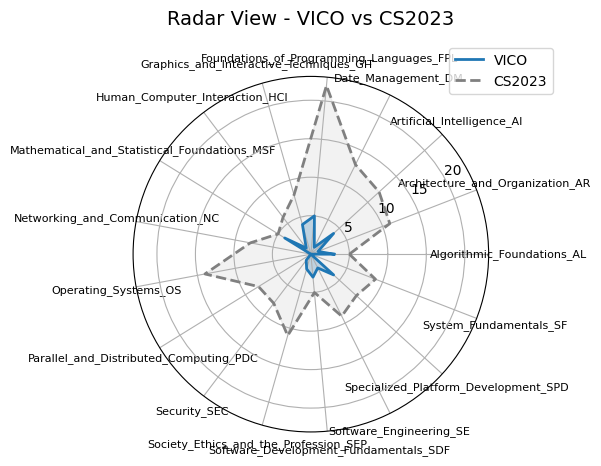

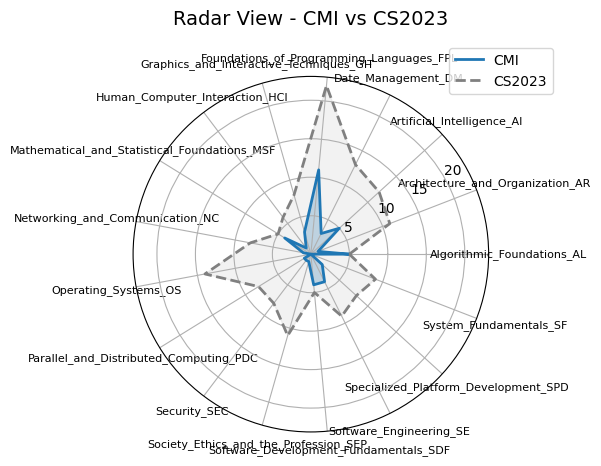

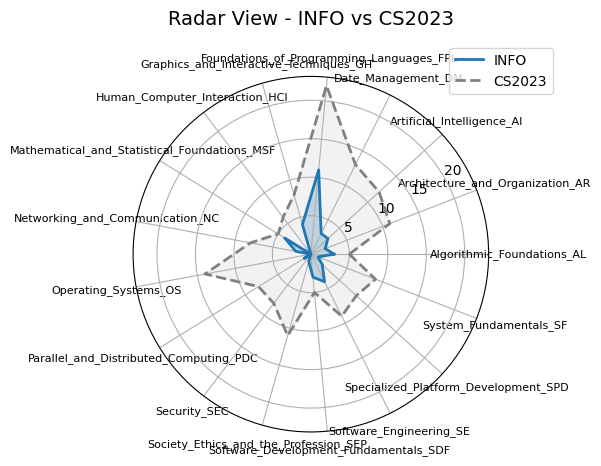

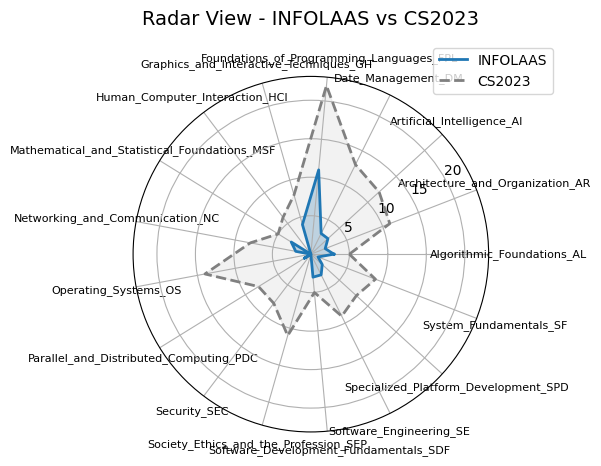

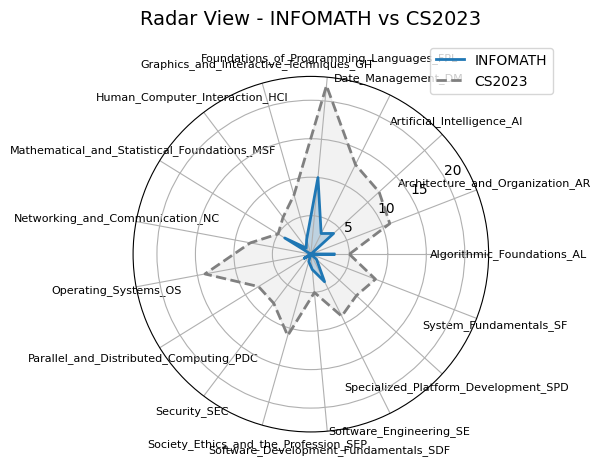

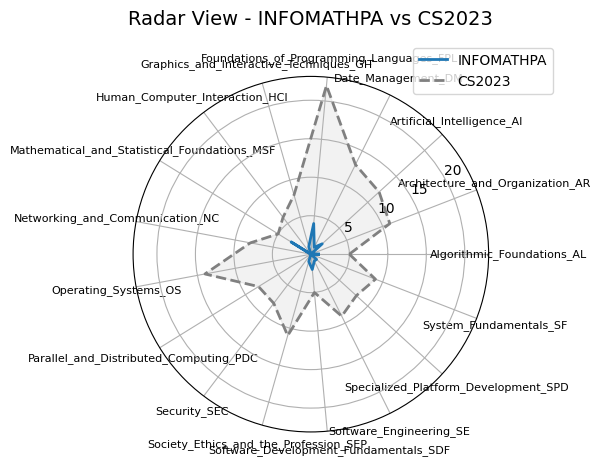

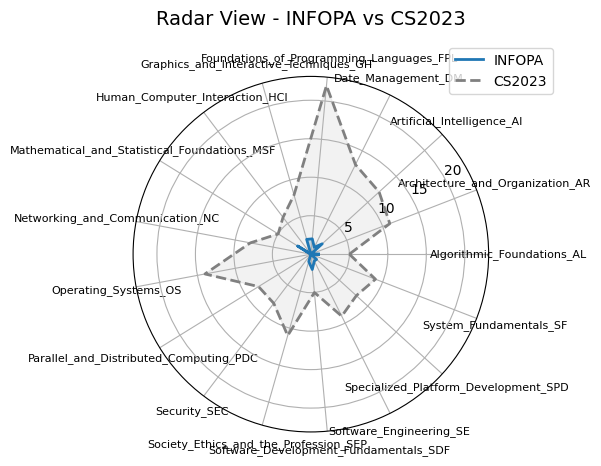

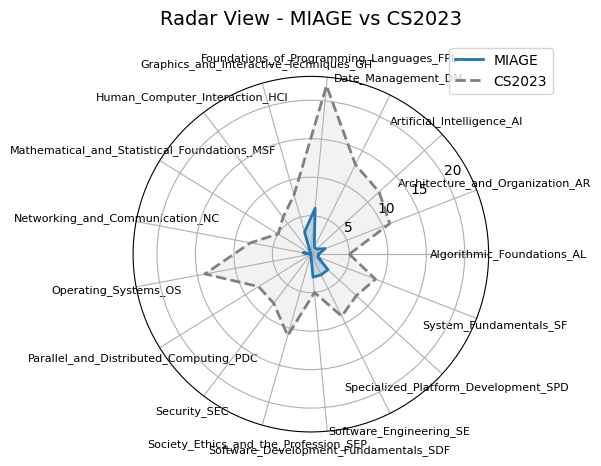

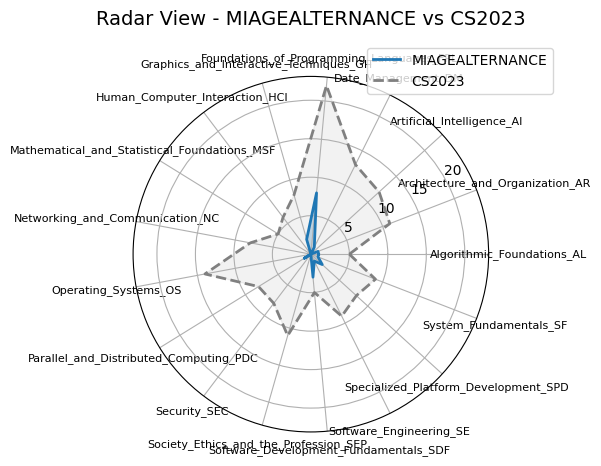

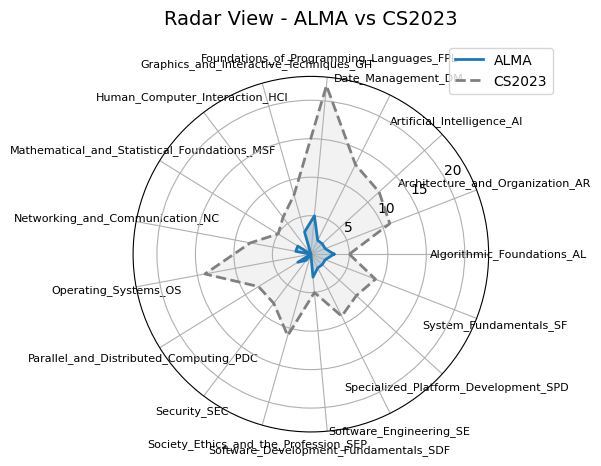

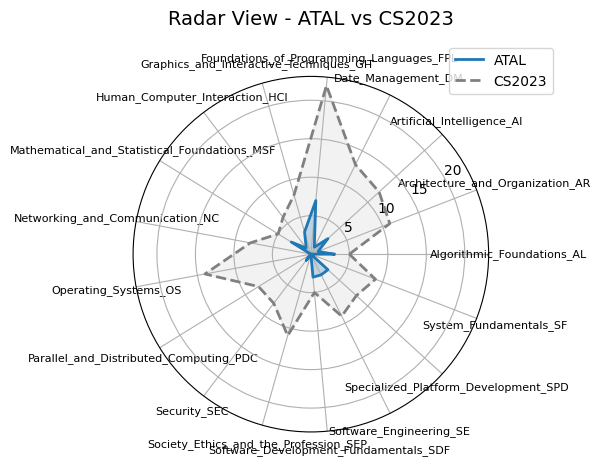

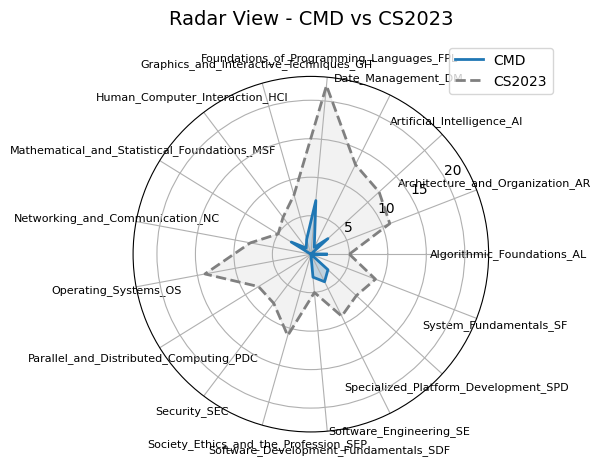

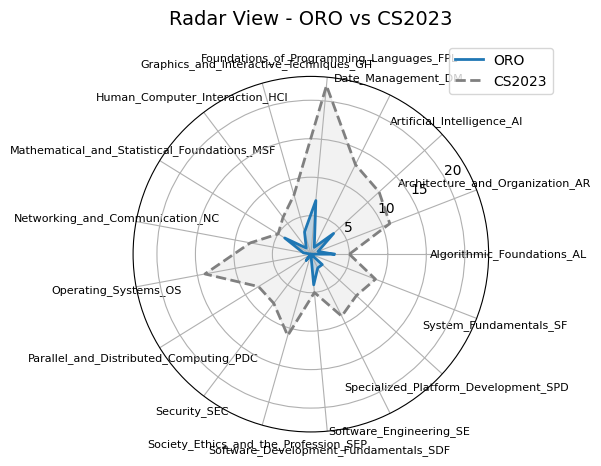

In [43]:

# 1. Collecte des résultats de la requête
data = defaultdict(dict)  # {parcours: {ka: nb_ku}}

for row in radar_data:
    parcours = str(row.parcours)
    ka = str(row.ka)
    nb_ku = int(row.nb_ku)
    data[parcours][ka] = nb_ku

# adding the REF
for row in ref_data:
    parcours = "CS2023"
    ka = str(row.ka)
    nb_ku = int(row.nb_ku)
    data[parcours][ka] = nb_ku


# 2. Construction de l'ensemble des axes (toutes les KA rencontrées)
all_kas = sorted({ka for parcours_data in data.values() for ka in parcours_data})

# 3. Plot radar chart par parcours
def radar_factory(num_vars):
    # angles equally spaced around the circle
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop
    return angles

angles = radar_factory(len(all_kas))


# 3. Plot radar chart par parcours (hors CS2023)
for parcours, ka_dict in data.items():
    if parcours == "CS2023":
        continue  # on trace CS2023 uniquement en référence

    # Récupérer les valeurs pour le parcours courant
    values = [ka_dict.get(ka, 0) for ka in all_kas]
    values += values[:1]  # fermer le graphe

    # Récupérer les valeurs pour la référence
    ref_values = [data["CS2023"].get(ka, 0) for ka in all_kas]
    ref_values += ref_values[:1]

    # Création du radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Tracé des deux courbes
    ax.plot(angles, values, linewidth=2, label=parcours)
    ax.fill(angles, values, alpha=0.25)

    ax.plot(angles, ref_values, linewidth=2, linestyle='--', label="CS2023", color='gray')
    ax.fill(angles, ref_values, alpha=0.1, color='gray')

    # Configuration du graphique
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(all_kas, fontsize=8, wrap=True)
    ax.set_title(f"Radar View - {parcours} vs CS2023", size=14, pad=20)
    ax.set_rlabel_position(30)
    ax.grid(True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

    plt.tight_layout()
    plt.show()


In [44]:
minority_report="""
PREFIX ns1: <http://provo.org/> 
PREFIX ns2: <http://example.org/course/> 
PREFIX ns3: <http://align.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT ?ue ?ku ?model ?answer ?score
WHERE {
  ?ue ns3:to [
    ns2:ku ?ku ;
    ns2:answer ?answer ;
    ns3:score ?score ;
    ns1:wasGeneratedBy [ ns1:used ?model ]
  ] .
} order by ?ue ?ku ?model
"""
mreport_data = g.query(minority_report)
for row in mreport_data:
    print(f"UE: {row.ue}, KU: {row.ku}, Model: {row.model}, Answer: {row.answer}, Score: {row.score}")


UE: http://example.org/course/UE_Inconnu, KU: AI-ML_Machine_Learning, Model: deepseek-r1-distill-llama-70b, Answer: 0, Score: 0.69270205
UE: http://example.org/course/UE_Inconnu, KU: AI-ML_Machine_Learning, Model: deepseek-r1-distill-llama-70b, Answer: 0, Score: 0.7422149
UE: http://example.org/course/UE_Inconnu, KU: AI-ML_Machine_Learning, Model: deepseek-r1-distill-llama-70b, Answer: 0, Score: 0.76012653
UE: http://example.org/course/UE_Inconnu, KU: AI-ML_Machine_Learning, Model: deepseek-r1-distill-llama-70b, Answer: 0, Score: 0.77731586
UE: http://example.org/course/UE_Inconnu, KU: AI-ML_Machine_Learning, Model: deepseek-r1-distill-llama-70b, Answer: 0, Score: 0.7679224
UE: http://example.org/course/UE_Inconnu, KU: AI-ML_Machine_Learning, Model: deepseek-r1-distill-llama-70b, Answer: 0, Score: 0.76750326
UE: http://example.org/course/UE_Inconnu, KU: AI-ML_Machine_Learning, Model: deepseek-r1-distill-llama-70b, Answer: 0, Score: 0.7594423
UE: http://example.org/course/UE_Inconnu, KU

/var/folders/r9/qykcs5sx4pd87v_cyp4hg9kh0000gp/T/ipykernel_80266/3803695391.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.heatmap(pivot_df.replace({'0': 0, '1': 1}), cmap="coolwarm", annot=True, cbar=False)


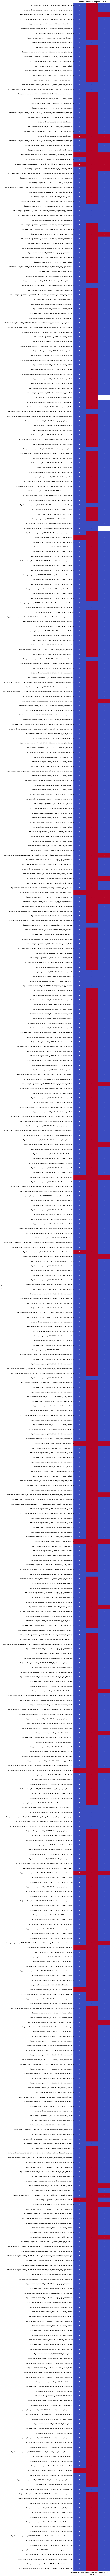

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Récupération des résultats dans une liste
results = []
for row in mreport_data:
    results.append({
        'UE': str(row.ue),
        'KU': str(row.ku),
        'Model': str(row.model),
        'Answer': str(row.answer),
        'Score': float(row.score)
    })

# Création d’un DataFrame
df = pd.DataFrame(results)

# Pivot pour heatmap: lignes = (UE, KU), colonnes = modèles, valeurs = réponse
pivot_df = df.pivot_table(index=['UE', 'KU'], columns='Model', values='Answer', aggfunc='first')

# Affichage sous forme de heatmap catégorielle (0/1)
plt.figure(figsize=(12, max(6, len(pivot_df) * 0.5)))
sns.heatmap(pivot_df.replace({'0': 0, '1': 1}), cmap="coolwarm", annot=True, cbar=False)
plt.title("Réponses des modèles par (UE, KU)")
plt.xlabel("Modèle")
plt.ylabel("UE - KU")
plt.tight_layout()
plt.show()


In [46]:
consensus_align="""
PREFIX ns1: <http://provo.org/> 
PREFIX ns2: <http://example.org/course/> 
PREFIX ns3: <http://align.org/>

SELECT DISTINCT ?ue ?ku
WHERE {
  # Tous les modèles ayant donné un avis ont répondu "1"
  ?ue ns3:to [
    ns2:ku ?ku ;
    ns2:answer "1"
  ] .

  # Il ne doit exister aucun modèle ayant répondu "0" sur cette paire
  FILTER NOT EXISTS {
    ?ue ns3:to [
      ns2:ku ?ku ;
      ns2:answer "0"
    ]
  }
}
"""
qres = g.query(consensus_align)
for row in qres:
    # On affiche les UE et KU qui ont un consensus
    # d'alignement (tous les modèles ont répondu "1" et aucun n'a répondu "0")
    print(f"UE: {row.ue}, KU: {row.ku}")

UE: http://example.org/course/UE_X31I020, KU: SDF-Algorithms
UE: http://example.org/course/UE_X31I040, KU: NC-Applications_Networked_Applications
UE: http://example.org/course/UE_X31I050, KU: AR-Assembly_Assembly_Level_Machine_Organization
UE: http://example.org/course/UE_XLG4IU030, KU: PDC-Synchronization_and_Concurrency
UE: http://example.org/course/UE_XLG5IU110, KU: SE-Project_Management
UE: http://example.org/course/UE_XLG6IU140, KU: SDF-Algorithms
UE: http://example.org/course/UE_XLG6IU320, KU: SDF-Algorithms
UE: http://example.org/course/UE_XMS1IU310, KU: FPL-Methodologies_Formal_Development_Methodologies
UE: http://example.org/course/UE_XMS2IU010, KU: SDF-Society_Ethics_and_the_Profession


In [ ]:
verif_report="""
PREFIX provo: <http://provo.org/> 
PREFIX course: <http://example.org/course/> 
PREFIX align: <http://align.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?ue ?ue_text ?ku ?ku_source (GROUP_CONCAT(CONCAT(?answer,':',?model);separator=",") as ?rep)
WHERE {
  ?ue course:parcours_level "M1" ;
      course:parcours_code "ALMA" .
  ?ue course:content ?content .
  ?ue rdfs:label ?label .
  ?ue course:objective ?objective .
  BIND(CONCAT("Label: ",STR(?label)," Objectif: ",STR(?objective),
                " Course content: ", STR(?content)," Course name: ",STR(?ue)) AS ?ue_text)
  ?ue align:to [
    course:ku ?ku ;
    align:ku_source ?ku_source ;
    course:answer ?answer ;
    align:score ?score ;
    provo:wasGeneratedBy [ provo:used ?model ]
  ] .
} group by ?ue ?ku 
"""
verif_data = g.query(verif_report)
for row in verif_data:
    print(f"UE: {row.ue},  KU: {row.ku},  Answer: {row.rep}")

UE: http://example.org/course/UE_Inconnu,  KU: AI-Vision_Perception_and_Computer_Vision,  Answer: 0:deepseek-r1-distill-llama-70b,1:llama3-8b-8192,0:deepseek-r1-distill-llama-70b,1:qwen-qwq-32b,1:llama3-8b-8192,0:qwen-qwq-32b,1:llama3-8b-8192,0:deepseek-r1-distill-llama-70b,0:qwen-qwq-32b,0:deepseek-r1-distill-llama-70b,1:llama3-8b-8192,1:llama3-8b-8192,0:deepseek-r1-distill-llama-70b,0:qwen-qwq-32b,1:llama3-8b-8192,0:deepseek-r1-distill-llama-70b,1:qwen-qwq-32b,0:deepseek-r1-distill-llama-70b,0:deepseek-r1-distill-llama-70b,0:deepseek-r1-distill-llama-70b,0:deepseek-r1-distill-llama-70b,1:llama3-8b-8192,1:llama3-8b-8192,1:llama3-8b-8192,0:qwen-qwq-32b,0:deepseek-r1-distill-llama-70b,1:qwen-qwq-32b,0:qwen-qwq-32b,0:qwen-qwq-32b,0:deepseek-r1-distill-llama-70b,1:llama3-8b-8192,0:deepseek-r1-distill-llama-70b,0:deepseek-r1-distill-llama-70b,1:llama3-8b-8192,1:llama3-8b-8192,1:llama3-8b-8192,0:deepseek-r1-distill-llama-70b,1:llama3-8b-8192,1:llama3-8b-8192,1:llama3-8b-8192,1:llama3-8b-819

In [ ]:
## uncovered KUs
## very long to compute like that...

# Fusionner les deux graphes dans un graphe "dataset" avec nommage
from rdflib import Dataset


# Fichiers TTL (à adapter selon ton projet)
ALL_KUS_FILE = "./XP/graph_bok_nohours.ttl"
ALIGNMENTS_FILE = ["XP/all-align-0-100.ttl","XP/all-align-100-200.ttl","XP/all-align-200-300.ttl"]
COURSES_FILE = "./data/all2025.ttl"

ds = Dataset()
ds.graph(URIRef("http://global-ku-graph")).parse(ALL_KUS_FILE, format="turtle")
for f in ALIGNMENTS_FILE:
  ds.graph(URIRef("http://ue-alignments")).parse(f, format="turtle")
ds.graph(URIRef("http://ue-course")).parse(COURSES_FILE, format="turtle")

# Requête SPARQL
query = """
PREFIX bok: <http://example.org/bok/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 
PREFIX align: <http://align.org/>
PREFIX course: <http://example.org/course/>
prefix prov: <http://provo.org/> 


SELECT DISTINCT ?ku
WHERE {
  GRAPH <http://global-ku-graph> {
    ?ku bok:part_of ?ka .
  }
  FILTER NOT EXISTS {
    GRAPH <http://ue-alignments> {
      ?ue align:to [
        course:answer "1" ;
        course:ku ?ku ;
        prov:wasGeneratedBy [ prov:used "llama3-8b-8192" ]
        ].
    }
  }
}
"""

# Exécuter la requête
results = ds.query(query)

# Afficher les KUs non couvertes

print("KUs non couvertes par une UE :")
print(f"Nombre de KUs non couvertes : {len(results)}")
for row in results:
    print(f"- {row.ku}")
